In [7]:
%matplotlib inline
import numpy as np
import mxnet as mx
from mxnet import nd, autograd, gluon
mx.random.seed(1)


import matplotlib.pyplot as plt

In [113]:
#Set context 
ctx = mx.cpu()

#Grab Data
batch_size = 64
num_inputs = 784
num_outputs = 10

def transform(data, label):
    return mx.nd.transpose(data.astype(np.float32), (2,0,1))/255, label.astype(np.float32)

train_data = gluon.data.DataLoader(
    gluon.data.vision.FashionMNIST(train=True, transform=transform), batch_size=128, shuffle=True)

validation_data = gluon.data.DataLoader(
    gluon.data.vision.FashionMNIST(train=False, transform=transform), batch_size=128, shuffle=False)

#Define ConvNet
num_fc = 512
net = gluon.nn.Sequential()
with net.name_scope():
    net.add(gluon.nn.Conv2D(channels=20, kernel_size=5, activation='relu'))
    net.add(gluon.nn.MaxPool2D(pool_size=2, strides=2))
    net.add(gluon.nn.Conv2D(channels=50, kernel_size=5, activation='relu'))
    net.add(gluon.nn.MaxPool2D(pool_size=2, strides=2))
    # The Flatten layer collapses all axis, except the first one, into one axis.
    net.add(gluon.nn.Flatten())
    net.add(gluon.nn.Dense(num_fc, activation="relu"))
    net.add(gluon.nn.Dense(num_outputs))

#Parameter Initialization
net.collect_params().initialize(mx.init.Xavier(magnitude=2.24), ctx=ctx)


#Softmax Entropy Loss
softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()


#Optimizer
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': .1})

#Evaluate Accuracy
def evaluate_accuracy(data_iterator, net):
    acc = mx.metric.Accuracy()
    for i, (data, label) in enumerate(data_iterator):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        output = net(data)
        predictions = nd.argmax(output, axis=1)
        acc.update(preds=predictions, labels=label)
    return acc.get()[1]


In [114]:
#Training Loop
epochs = 10
smoothing_constant = .01

for e in range(epochs):
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)
        with autograd.record():
            output = net(data)
            loss = softmax_cross_entropy(output, label)
        loss.backward()
        trainer.step(data.shape[0])

        ##########################
        #  Keep a moving average of the losses
        ##########################
        curr_loss = nd.mean(loss).asscalar()
        moving_loss = (curr_loss if ((i == 0) and (e == 0))
                       else (1 - smoothing_constant) * moving_loss + smoothing_constant * curr_loss)

    test_accuracy = evaluate_accuracy(validation_data, net)
    train_accuracy = evaluate_accuracy(train_data, net)
    print("Epoch %s. Loss: %s, Train_acc %s, Test_acc %s" % (e, curr_loss, train_accuracy, test_accuracy))

Epoch 0. Loss: 0.47355244, Train_acc 0.801016666667, Test_acc 0.8038
Epoch 1. Loss: 0.52972084, Train_acc 0.83235, Test_acc 0.8326
Epoch 2. Loss: 0.33252972, Train_acc 0.871816666667, Test_acc 0.8696
Epoch 3. Loss: 0.34943375, Train_acc 0.888983333333, Test_acc 0.8854
Epoch 4. Loss: 0.27487943, Train_acc 0.892883333333, Test_acc 0.8857
Epoch 5. Loss: 0.29497984, Train_acc 0.90235, Test_acc 0.8935
Epoch 6. Loss: 0.29334274, Train_acc 0.9038, Test_acc 0.8905
Epoch 7. Loss: 0.31160796, Train_acc 0.884533333333, Test_acc 0.8712
Epoch 8. Loss: 0.21808083, Train_acc 0.916133333333, Test_acc 0.9028
Epoch 9. Loss: 0.22609513, Train_acc 0.92025, Test_acc 0.9058


(1L, 1L, 28L, 28L)


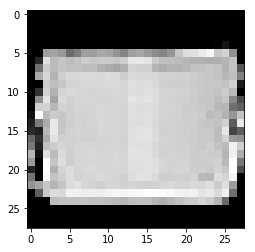

model predictions are: Bag
(1L, 1L, 28L, 28L)


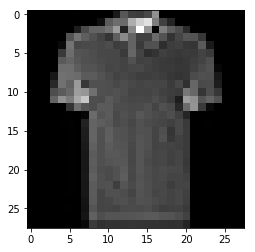

model predictions are: T-shirt/top
(1L, 1L, 28L, 28L)


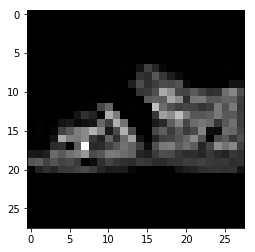

model predictions are: Sandal
(1L, 1L, 28L, 28L)


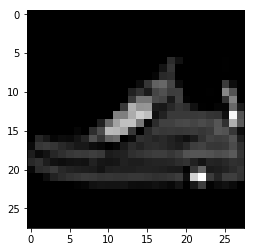

model predictions are: Sneaker
(1L, 1L, 28L, 28L)


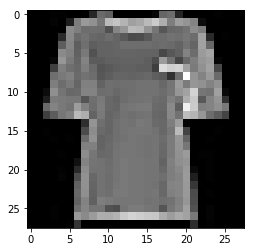

model predictions are: T-shirt/top
(1L, 1L, 28L, 28L)


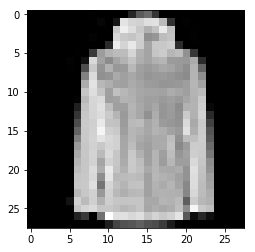

model predictions are: Coat
(1L, 1L, 28L, 28L)


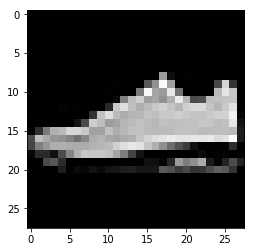

model predictions are: Sneaker
(1L, 1L, 28L, 28L)


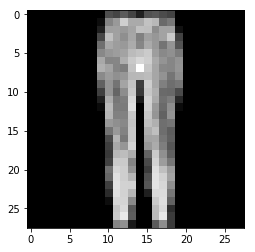

model predictions are: Trouser
(1L, 1L, 28L, 28L)


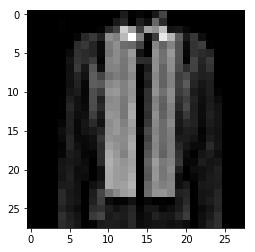

model predictions are: Trouser
(1L, 1L, 28L, 28L)


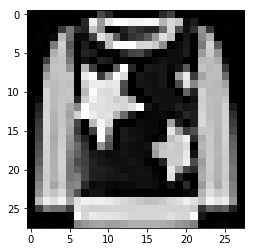

model predictions are: Pullover
(1L, 1L, 28L, 28L)


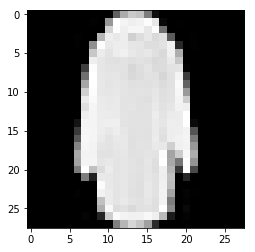

model predictions are: Coat
(1L, 1L, 28L, 28L)


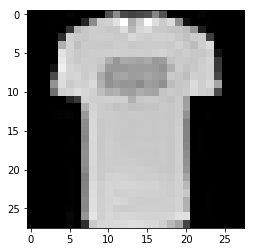

model predictions are: T-shirt/top
(1L, 1L, 28L, 28L)


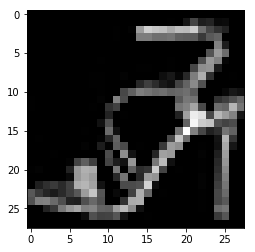

model predictions are: Sandal
(1L, 1L, 28L, 28L)


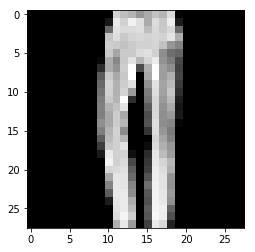

model predictions are: Trouser
(1L, 1L, 28L, 28L)


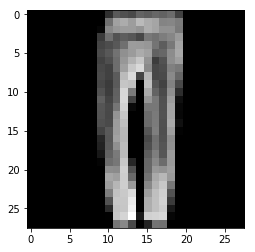

model predictions are: Trouser
(1L, 1L, 28L, 28L)


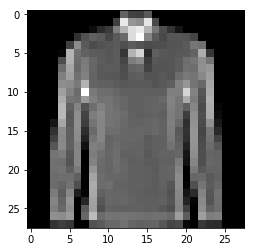

model predictions are: Shirt
(1L, 1L, 28L, 28L)


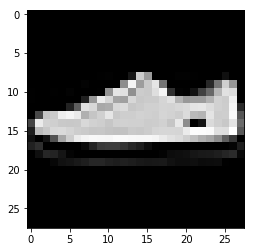

model predictions are: Sneaker
(1L, 1L, 28L, 28L)


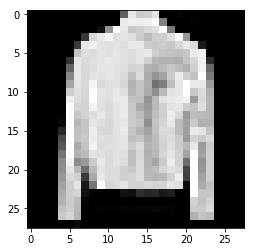

model predictions are: Coat
(1L, 1L, 28L, 28L)


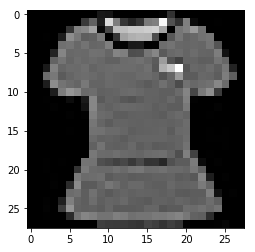

model predictions are: T-shirt/top
(1L, 1L, 28L, 28L)


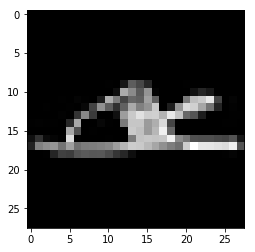

model predictions are: Sandal


In [124]:
# Predictions

def model_predict(net,data):
    output = net(data.as_in_context(ctx))
    return nd.argmax(output, axis=1)


# let's sample 10 random data points from the test set
sample_data = mx.gluon.data.DataLoader(gluon.data.vision.FashionMNIST(train=False, transform=transform)
                                       , 1
                                       , shuffle=True)

indx_to_label=['T-shirt/top'
                ,'Trouser'
                ,'Pullover'
                ,'Dress'
                ,'Coat'
                ,'Sandal'
                ,'Shirt'
                ,'Sneaker'
                ,'Bag'
                , 'Ankle boot' ]

#plt.figure(figsize=(10,10*1))
count =20
for i, (data, label) in enumerate(sample_data):
    data = data.as_in_context(ctx)
    print(data.shape)
    im = nd.transpose(data,(1,0,2,3))
    im = nd.reshape(im,(28,1*28,1))
    
    imtiles = nd.tile(im, (1,1,3))

    plt.imshow(imtiles.asnumpy())
    plt.show()
    
    output = net(data)
    pred = nd.argmax(output, axis=1)[0]    
    print('model predictions are: %s' % (indx_to_label[int(pred.asscalar())]))
    count=count-1
    if count<=0:
        break
    #break
        

In [107]:
pred.asscalar()

7.0